# sorting algos

implementation of a bunch of different sorting algorithms with numba including: 
- bubble sort
- insertion sort
- merge sort
- selection sort
- quick sort

In [1]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define plt size
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
def new_X():
    """create new random X to be sorted and plot it"""
    global X
    X = np.random.randint(100, size=50)

    sns.barplot(X) 

## bubble sort

<Axes: >

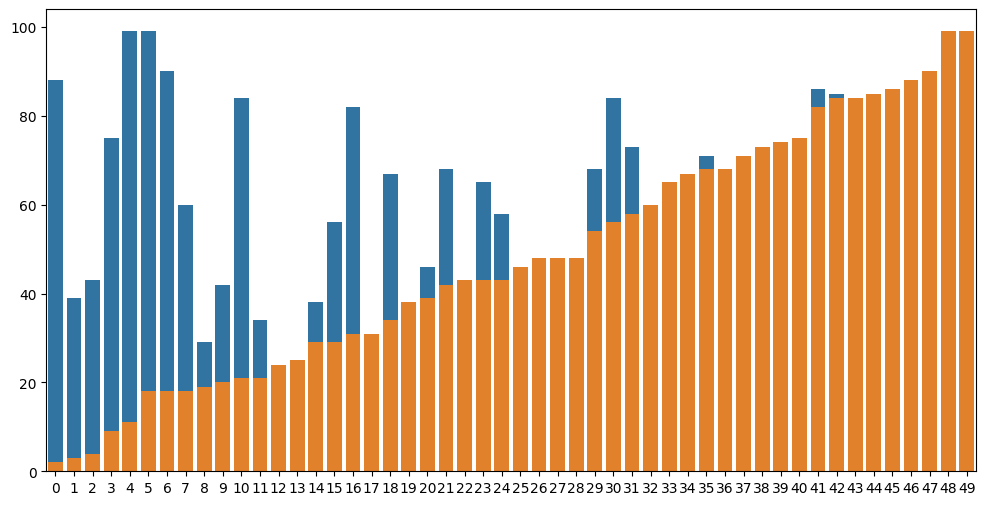

In [4]:
new_X()

@nb.njit
def bubble_sort(X):
    # as long as items have been swapped, keep the loop running
    swapped = True
    
    while swapped:
        swapped = False
        
        for i in range(len(X) - 1):
            # X[i + 1] is smaller than X[i]
            # swap items
            if X[i + 1] < X[i]:
                X[i], X[i + 1] = X[i + 1], X[i]
                swapped = True
                
        
    return X

sns.barplot(bubble_sort(X))

## insertion sort

<Axes: >

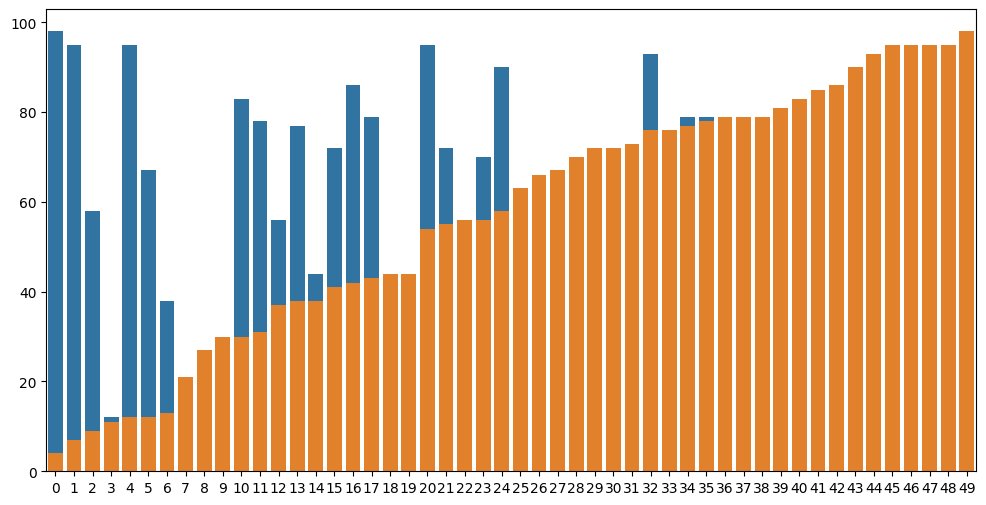

In [5]:
new_X()

@nb.njit
def insertion_sort(X):
    # the first element is already "sorted"
    # have a look at X[i]
    # and insert at the matching position in already "sorted" part of array (left of i)
    for i in range(1, len(X)):
        current_element = X[i]
        
        j = i - 1
        while j >= 0 and X[j] > current_element:
            X[j + 1] = X[j]
            j = j - 1
        
        X[j + 1] = current_element
        
    return X
    
sns.barplot(insertion_sort(X))

## merge sort

<Axes: >

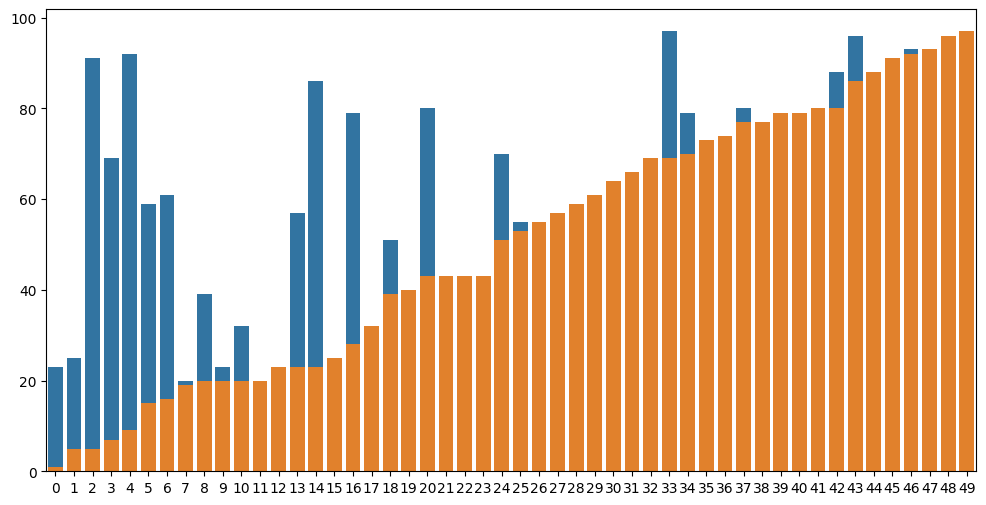

In [32]:
new_X()


def merge(l, r):
    new = np.zeros(len(l) + len(r))
    idxl, idxr, idxres = 0, 0, 0

    while idxl < len(l) and idxr < len(r):
        if l[idxl] < r[idxr]:
            new[idxres] = l[idxl]
            idxl += 1
        else: 
            new[idxres] = r[idxr]
            idxr += 1

        idxres += 1

    while idxl < len(l):
        new[idxres] = l[idxl]
        idxl += 1
        idxres += 1

    while idxr < len(r):
        new[idxres] = r[idxr]
        idxr += 1
        idxres += 1

    return new
    

def merge_sort(X):
    if len(X) <= 1:
        return X

    mid = len(X) // 2
    
    l = merge_sort(X[:mid])
    r = merge_sort(X[mid:])

    return merge(l, r)


sns.barplot(merge_sort(X))

## selection sort

In [ ]:
new_X()

@nb.njit
def selection_sort(X):
    for i in range(len(X) - 1):
        # find minimum right of the current index i
        min_idx = i
        for j in range(i + 1, len(X)):
            if X[j] < X[min_idx]:
                min_idx = j

        # swap current index and the min_idx
        X[i], X[min_idx] = X[min_idx], X[i]
    return X

sns.barplot(selection_sort(X))

## quicksort

<Axes: >

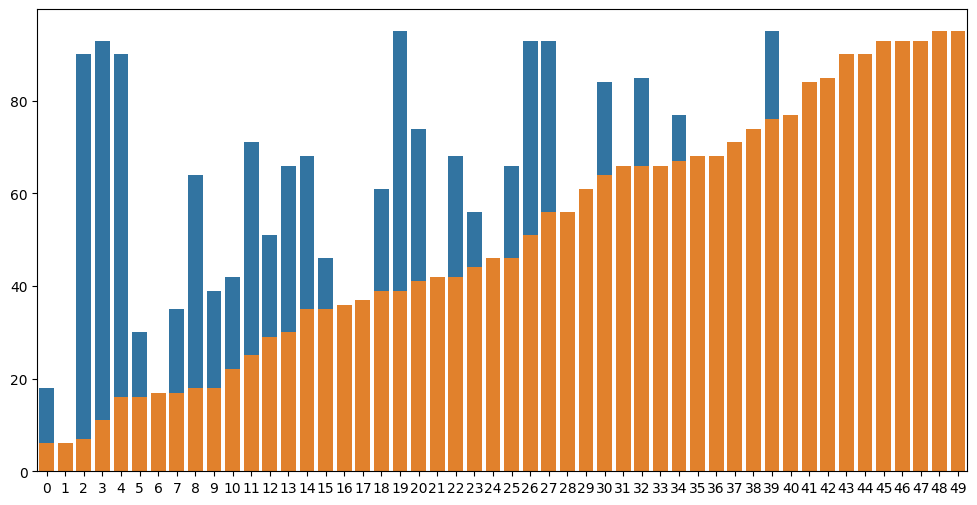

In [44]:
new_X()

def quicksort(X, l, r):
    i, j = l, r

    pivot = X[(l + r) // 2]

    while i <= j:
        while X[i] < pivot:
            i += 1

        while X[j] > pivot:
            j -= 1

        if i <= j:
            X[i], X[j] = X[j], X[i]

            i += 1
            j -= 1

    if l < j:
        quicksort(X, l, j)
    if i < r:
        quicksort(X, i, r)

    return X

sns.barplot(quicksort(X, 0, len(X) - 1))